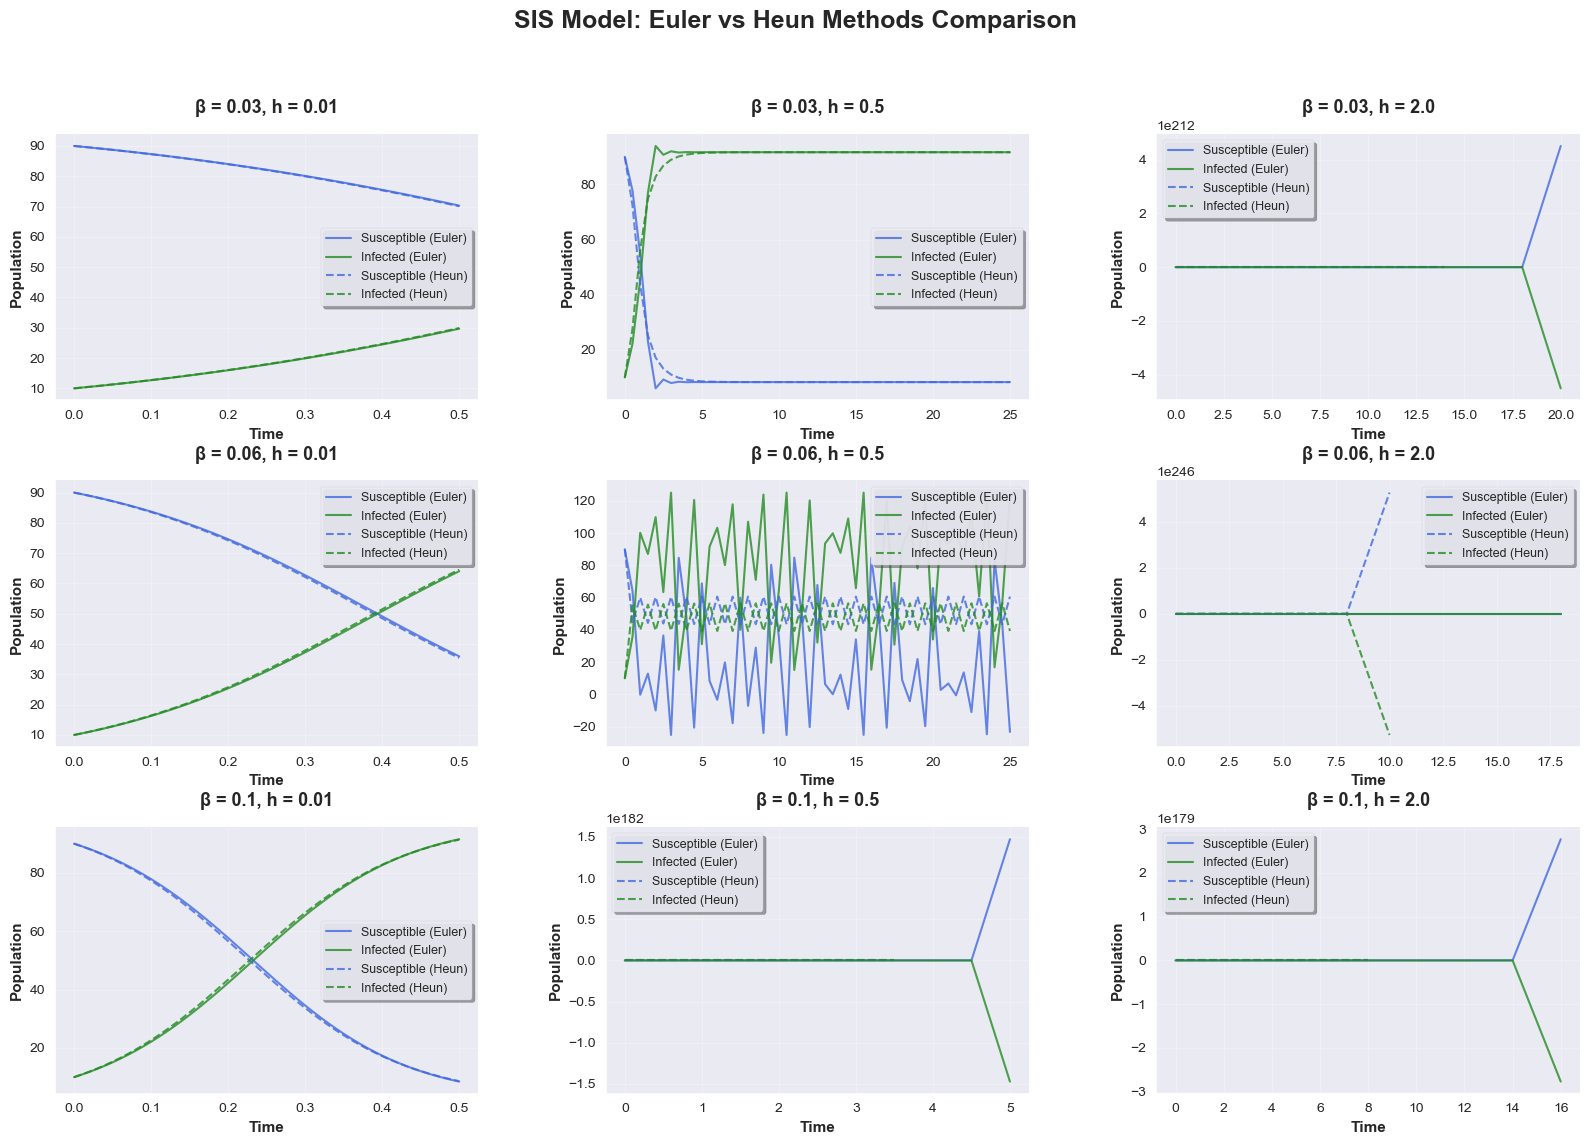

Final values comparison:
β=0.03, h=0.01:
  Euler:  S=7.03e+01, I=2.97e+01
  Heun:   S=7.01e+01, I=2.99e+01
  Difference: ΔS=2.2270e-01, ΔI=2.2270e-01
β=0.03, h=0.5:
  Euler:  S=8.33e+00, I=9.17e+01
  Heun:   S=8.33e+00, I=9.17e+01
  Difference: ΔS=4.9637e-11, ΔI=4.9667e-11
β=0.03, h=2.0:
  Euler:  S=nan, I=nan
  Heun:   S=nan, I=nan
  Difference: ΔS=nan, ΔI=nan
β=0.06, h=0.01:
  Euler:  S=3.60e+01, I=6.40e+01
  Heun:   S=3.54e+01, I=6.46e+01
  Difference: ΔS=5.1522e-01, ΔI=5.1522e-01
β=0.06, h=0.5:
  Euler:  S=-2.32e+01, I=1.23e+02
  Heun:   S=6.07e+01, I=3.93e+01
  Difference: ΔS=8.3908e+01, ΔI=8.3908e+01
β=0.06, h=2.0:
  Euler:  S=nan, I=nan
  Heun:   S=nan, I=nan
  Difference: ΔS=nan, ΔI=nan
β=0.1, h=0.01:
  Euler:  S=8.48e+00, I=9.15e+01
  Heun:   S=8.63e+00, I=9.14e+01
  Difference: ΔS=1.5109e-01, ΔI=1.5109e-01
β=0.1, h=0.5:
  Euler:  S=nan, I=nan
  Heun:   S=nan, I=nan
  Difference: ΔS=nan, ΔI=nan
β=0.1, h=2.0:
  Euler:  S=nan, I=nan
  Heun:   S=nan, I=nan
  Difference: ΔS=nan, Δ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set style for better plots
plt.style.use('seaborn-v0_8')
rcParams['figure.figsize'] = (12, 8)
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['figure.titlesize'] = 16

# Set color palette
sns.set_palette("husl")

def sis_odes(S, I, beta, gamma):
    """
    Equations for SIS model
    """
    dS = -beta * S * I + gamma * I
    dI = beta * S * I - gamma * I
    return dS, dI

def euler_sis(beta, gamma, h, steps=50, S0=90, I0=10):
    """
    Euler method for SIS model - NO stability constraints
    """
    S_points = [S0]
    I_points = [I0]
    
    for i in range(steps):
        # Get derivatives at current point
        dS, dI = sis_odes(S_points[-1], I_points[-1], beta, gamma)
        
        # Update using Euler method (no constraints)
        S_new = S_points[-1] + h * dS
        I_new = I_points[-1] + h * dI
        
        S_points.append(S_new)
        I_points.append(I_new)
    return S_points, I_points

def heun_sis(beta, gamma, h, steps=50, S0=90, I0=10):
    """
    Heun's method for SIS model - NO stability constraints
    """
    S_points = [S0]
    I_points = [I0]
    
    for i in range(steps):
        # Current values
        S_current = S_points[-1]
        I_current = I_points[-1]
        
        # First step: Euler step to get intermediate values
        dS1, dI1 = sis_odes(S_current, I_current, beta, gamma)
        S_euler = S_current + h * dS1
        I_euler = I_current + h * dI1
        
        # Second step: Heun prediction using average of slopes
        dS2, dI2 = sis_odes(S_euler, I_euler, beta, gamma)
        S_new = S_current + (h/2) * (dS1 + dS2)
        I_new = I_current + (h/2) * (dI1 + dI2)
        
        S_points.append(S_new)
        I_points.append(I_new)
    return S_points, I_points

N = 100  # Total population
gamma = 0.25  # Recovery rate
betas = [0.03, 0.06, 0.1]  # Transmission rates
step_sizes = [0.01, 0.5, 2.0]  # Step sizes
S0, I0 = 90, 10  # Initial conditions

# AI assist on plotting - I wanted to have nicer plots than Rae - still failed
susceptible_color = '#4169E1'  # Royal blue for susceptible
infected_color = '#228B22'     # Forest green for infected

# Create a 3x3 grid for the 9 plots with better spacing
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('SIS Model: Euler vs Heun Methods Comparison', 
             fontsize=18, fontweight='bold', y=0.98)

for i, beta in enumerate(betas):
    for j, h in enumerate(step_sizes):
        # Run both methods
        S_euler, I_euler = euler_sis(beta, gamma, h)
        S_heun, I_heun = heun_sis(beta, gamma, h)
        
        # Create time array
        time_steps = [k * h for k in range(51)]  # 51 points for 50 steps
        
        # Get the current subplot axis
        ax = axes[i, j]
        
        # Plot Euler method (solid lines)
        ax.plot(time_steps, S_euler, color=susceptible_color, linestyle='-', 
                label='Susceptible (Euler)', linewidth=1.5, alpha=0.8)
        ax.plot(time_steps, I_euler, color=infected_color, linestyle='-', 
                label='Infected (Euler)', linewidth=1.5, alpha=0.8)
        
        # Plot Heun method (dashed lines)
        ax.plot(time_steps, S_heun, color=susceptible_color, linestyle='--', 
                label='Susceptible (Heun)', linewidth=1.5, alpha=0.8)
        ax.plot(time_steps, I_heun, color=infected_color, linestyle='--', 
                label='Infected (Heun)', linewidth=1.5, alpha=0.8)
        
        # Enhanced formatting
        ax.set_title(f'β = {beta}, h = {h}', fontsize=13, fontweight='bold', pad=15)
        ax.set_xlabel('Time', fontsize=11, fontweight='bold')
        ax.set_ylabel('Population', fontsize=11, fontweight='bold')
        
        # Improved legend
        ax.legend(loc='best', frameon=True, fancybox=True, shadow=True, 
                 framealpha=0.9, fontsize=9)
        
        # Enhanced grid
        ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
        
        # NO fixed y-limits - let it show the instabilities
        # ax.set_ylim(0, 100)  # REMOVED
        
        # Improve axis appearance
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)

# Improve overall layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
# Save with high resolution and tight bounding box
plt.savefig('images/sis_model_high_quality.png', 
           dpi=300,           # High resolution (300 DPI)
           bbox_inches='tight',  # Remove extra whitespace
           facecolor='white',    # Ensure white background
           edgecolor='none')     # No border
plt.show()

print("Final values comparison:")
print("=" * 60)
for beta in betas:
    for h in step_sizes:
        S_euler, I_euler = euler_sis(beta, gamma, h)
        S_heun, I_heun = heun_sis(beta, gamma, h)
        print(f"β={beta}, h={h}:")
        print(f"  Euler:  S={S_euler[-1]:.2e}, I={I_euler[-1]:.2e}")
        print(f"  Heun:   S={S_heun[-1]:.2e}, I={I_heun[-1]:.2e}")
        print(f"  Difference: ΔS={abs(S_euler[-1]-S_heun[-1]):.4e}, ΔI={abs(I_euler[-1]-I_heun[-1]):.4e}")